copy from:

https://github.com/dhrim/joongang_2020_03/blob/master/material/deep_learning/dnn_as_a_classifier.ipynb

# 분류기로서의 DNN

In [0]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import time

In [0]:
def build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count):

  x1 = np.random.rand(one_count)
  x1 = x1*(square_high-square_low) + square_low

  x0 = np.random.rand(zero_count*100)
  x0 = x0[ (x0<square_low) | (square_high<x0) ]
  x0 = x0[:zero_count]

  x = np.append(x1, x0)

  plt.hist(x)
  plt.xlim(0, 1)
  plt.show()

  # 범위 안의 것을 1, 범위 밖의 것을 0으로 하고
  all_data = np.ones((len(x),2))
  all_data[:,0] = x

  all_data[:len(x1),1] = 1
  all_data[len(x1):,1] = 0

  # 섞는다
  np.random.shuffle(all_data)

  # x, y로 분리하고
  x = all_data[:,0]
  y = all_data[:,1]

  plt.xlim(0, 1)

  plt.scatter(x, y)

  return x, y

# 네모 함수의 학습

특정 영역은 1, 이외의 영역은 0을 출력

1개의 출력 노드를 갖는다.

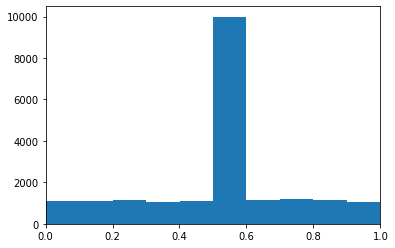

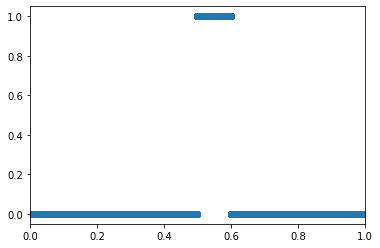

In [0]:
all_low = 0
all_high = 1
square_low = 0.5
square_high = 0.6
zero_count = 10000
one_count = 10000

train_x, train_y = build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count)

Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2478 - val_loss: 0.2444
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2426 - val_loss: 0.2410
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2395 - val_loss: 0.2375
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2356 - val_loss: 0.2329
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2303 - val_loss: 0.2267
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2232 - val_loss: 0.2184
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2136 - val_loss: 0.2072
Epoch 8/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2010 - val_loss: 0.1927
Epoch 9/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1849 - val_loss: 0.1748
Epoch 10/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1655 - val_lo

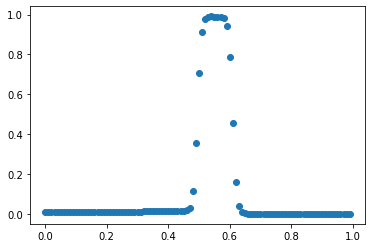

In [0]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="SGD", loss="mse")
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=32, validation_split=0.1)

x_ = np.arange(all_low, all_high, 0.01)
y_ = model.predict(x_)
plt.scatter(x_, y_)

특정 패턴인 경우 1, 다른 경우인 경우 0으로 분류한다.

출력된 값이 0.5보다 크면 1로, 0.5보다 작으면 0으로 간주한다.

# 클래스 2개, 출력 노드 2개

분류 카테고리의 개수 대로 출력노드를 갖고, one-hot-encoding된 값을 출력하면, 변별력이 커진다.

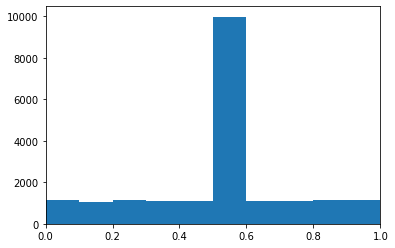

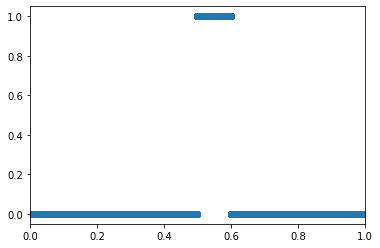

In [0]:
all_low = 0
all_high = 1
square_low = 0.5
square_high = 0.6
zero_count = 10000
one_count = 10000

train_x, train_y = build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count)

In [0]:
# ADD START
reshaped_y = train_y.reshape((train_y.shape[0],1))
train_y = np.append(reshaped_y, reshaped_y, axis=1)
train_y[:,1] = 1-train_y[:,0]
# ADD END

Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2622 - val_loss: 0.2374
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2267 - val_loss: 0.2120
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1963 - val_loss: 0.1750
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1495 - val_loss: 0.1155
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.0938 - val_loss: 0.0764
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.0701 - val_loss: 0.0646
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.0621 - val_loss: 0.0571
Epoch 8/100
563/563 [==============================] - 1s 1ms/step - loss: 0.0572 - val_loss: 0.0539
Epoch 9/100
563/563 [==============================] - 1s 1ms/step - loss: 0.0533 - val_loss: 0.0503
Epoch 10/100
563/563 [==============================] - 1s 1ms/step - loss: 0.0500 - val_lo

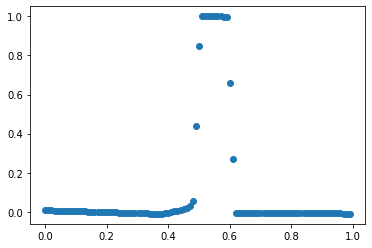

In [0]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse")
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=32, validation_split=0.1)

x_ = np.arange(all_low, all_high, 0.01)
y_ = model.predict(x_)
plt.scatter(x_, y_[:,0])

출력 노드의 값은 0과 1이 서로 상반된다.

하지만 이렇게 카테고리 개수 만큼 출력 노드가 있는 경우, 카테고리를 2개 이상으로 해도 처리가 가능해 진다.

# 클래스 4개, 출력 노드 4개

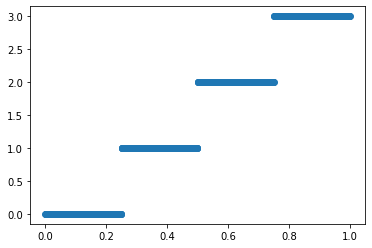

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [0]:
train_x = np.arange(0, 1, 0.001)

class_index = np.zeros_like(train_x, dtype=np.int)
class_index[:250] = 0
class_index[250:500] = 1
class_index[500:750] = 2
class_index[750:] = 3


plt.scatter(train_x, class_index)
plt.show()

train_y = np.zeros((1000, 4))
train_y[np.arange(1000), class_index] = 1 # one-hot 인코딩

print(train_y[245:255])

Epoch 1/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1904 - val_loss: 0.1975
Epoch 2/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1622 - val_loss: 0.1489
Epoch 3/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1396 - val_loss: 0.1281
Epoch 4/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1216 - val_loss: 0.1095
Epoch 5/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1092 - val_loss: 0.0964
Epoch 6/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0973 - val_loss: 0.1106
Epoch 7/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0859 - val_loss: 0.0831
Epoch 8/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0779 - val_loss: 0.0860
Epoch 9/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0731 - val_loss: 0.0764
Epoch 10/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0691 - val_lo

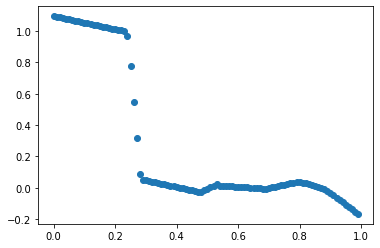

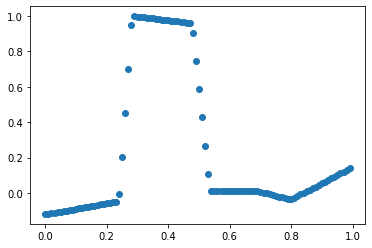

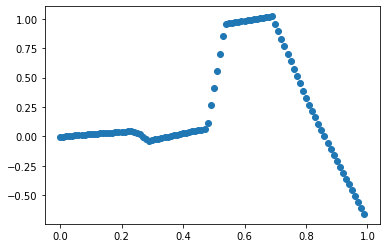

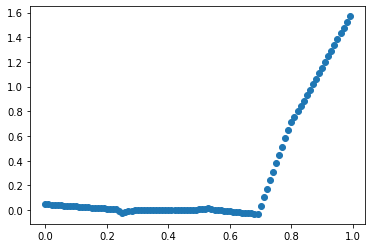

In [0]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4))

model.compile(optimizer="SGD", loss="mse")
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=1, validation_split=0.1)

x_ = np.arange(0, 1, 0.01)
y_ = model.predict(x_)
for i in range(4):
  plt.scatter(x_, y_[:,i])
  plt.show()
